In [115]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/utk-face-cropped/utkcropped/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcropped/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utk-face-cropped/utkcroppe

In [116]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import numpy as np

In [117]:
fldr="/kaggle/input/utk-face-cropped/utkcropped/"

In [118]:
data = []

In [119]:
for filename in os.listdir(fldr):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        data.append(filename)

In [120]:
ages = []
genders = []
images = []
for fle in data:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    
# READ IMAGE

    image = cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

In [121]:
for fle in data:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

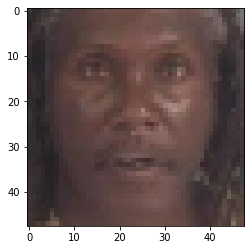

In [122]:
plt.imshow(images[8767])

In [123]:
print(ages[877])

45


In [124]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [125]:
np.save("/kaggle/working/image.npy ",images_f)
np.save("/kaggle/working/ages.npy", ages_f)
np.save("/kaggle/working/gender.npy", genders_f)

In [126]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317     1]


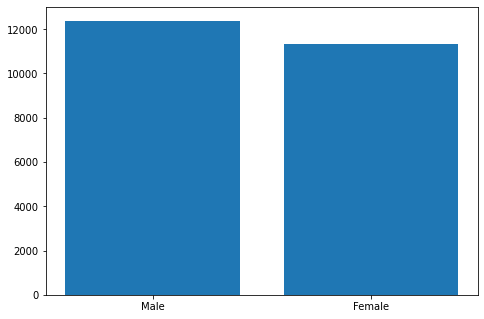

In [127]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values =[12391, 11317]
ax.bar(gender,values)
plt.show()

In [128]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  162  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [129]:
val = values.tolist()
cnt = counts.tolist()

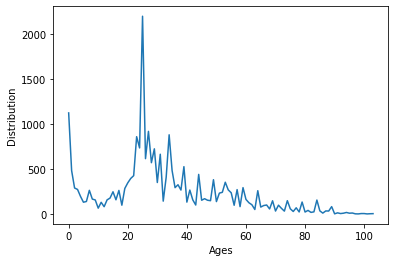

In [130]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [131]:
len(ages)

23709

In [132]:
len(genders)

23709

In [133]:
labels =[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [134]:
images_f_2= images_f/255


In [135]:
images_f_2.shape

(23709, 48, 48, 3)

In [136]:
images_f_2.shape

(23709, 48, 48, 3)

In [137]:
len(images_f)

23709

In [138]:
images_f.shape

(23709, 48, 48, 3)

In [139]:
labels_f=np.array(labels)

In [140]:
len(labels_f)

23709

In [141]:
labels_f.shape

(23709, 2)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size = 0.20)

In [144]:
y_train[0:5]

array([[20,  0],
       [ 2,  0],
       [75,  0],
       [30,  0],
       [47,  0]])

In [145]:
y_train_2 = [y_train[:,1], y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [146]:
y_train_2[0][0:5]

array([0, 0, 0, 0, 0])

In [147]:
y_train_2[1][0:5]

array([20,  2, 75, 30, 47])

In [148]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters, kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [149]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from keras.models import Model
from keras.layers import Input
from keras.regularizers import l2

In [150]:
def model(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)

    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)

    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)

    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)

    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPool2D(pool_size=(2,2))(conv_5)

    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)

    drop_1 = Dropout(0.20)(dense_1)
    drop_2 = Dropout(0.20)(dense_2)

    output_1 = Dense(1,activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1,activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [151]:
Model = model((48,48,3))

In [152]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [153]:
fle_s = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [154]:
History = Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=10, callbacks=callback_list)

Epoch 1/10
297/297 [==============================] - 76s 251ms/step - loss: 16.5029 - sex_out_loss: 0.7132 - age_out_loss: 15.5043 - sex_out_accuracy: 0.5233 - age_out_accuracy: 0.0470 - val_loss: 14.8593 - val_sex_out_loss: 0.6757 - val_age_out_loss: 13.9309 - val_sex_out_accuracy: 0.6118 - val_age_out_accuracy: 0.0481

Epoch 00001: val_loss improved from inf to 14.85925, saving model to Age_Sex_Detection.h5
Epoch 2/10
297/297 [==============================] - 73s 247ms/step - loss: 12.5745 - sex_out_loss: 0.6380 - age_out_loss: 11.6287 - sex_out_accuracy: 0.6415 - age_out_accuracy: 0.0467 - val_loss: 12.3772 - val_sex_out_loss: 0.6084 - val_age_out_loss: 11.4188 - val_sex_out_accuracy: 0.6797 - val_age_out_accuracy: 0.0481

Epoch 00002: val_loss improved from 14.85925 to 12.37723, saving model to Age_Sex_Detection.h5
Epoch 3/10
297/297 [==============================] - 74s 249ms/step - loss: 10.6249 - sex_out_loss: 0.5840 - age_out_loss: 9.6772 - sex_out_accuracy: 0.6990 - age_out

In [155]:
Model.evaluate(x_test,y_test_2)

149/149 [==============================] - 6s 38ms/step - loss: 10.0597 - sex_out_loss: 0.3221 - age_out_loss: 9.2111 - sex_out_accuracy: 0.8581 - age_out_accuracy: 0.0481


[10.059743881225586,
 0.32206442952156067,
 9.211106300354004,
 0.8580767512321472,
 0.04808097705245018]

In [156]:
pred = Model.predict(x_test)
pred[1]

array([[20.107113],
       [41.662937],
       [36.853745],
       ...,
       [13.923612],
       [19.279133],
       [19.938286]], dtype=float32)

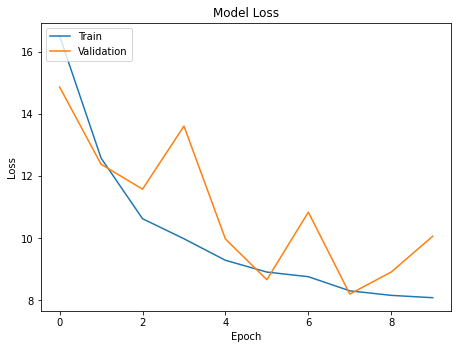

In [157]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

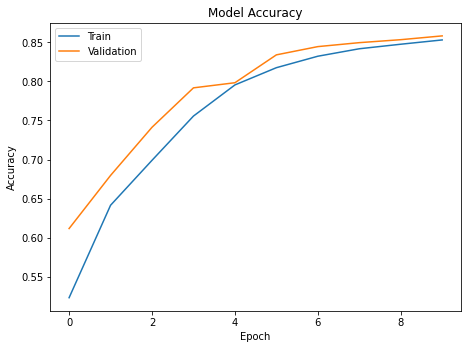

In [158]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

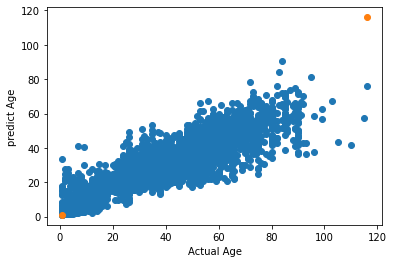

In [159]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.scatter([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()])
ax.set_xlabel('Actual Age')
ax.set_ylabel('predict Age')
plt.show()

In [160]:
i=0
Pred_d=[]
while(i<len(pred[0])):
    Pred_d.append(int(np.round(pred[0][i])))
    i=i+1

In [161]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [162]:
report = classification_report(y_test_2[0],Pred_d)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2523
           1       0.86      0.83      0.85      2219

    accuracy                           0.86      4742
   macro avg       0.86      0.86      0.86      4742
weighted avg       0.86      0.86      0.86      4742



In [163]:
results = confusion_matrix(y_test_2[0],Pred_d)

<AxesSubplot:>

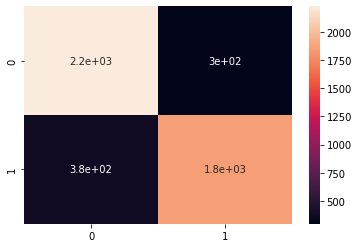

In [164]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [165]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))


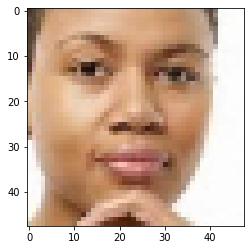

In [166]:
test_image(3244,images_f,images_f_2,Model)

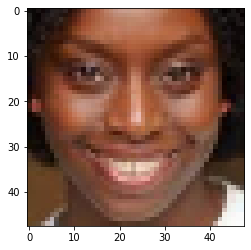

In [167]:
test_image(88,images_f,images_f_2,Model)

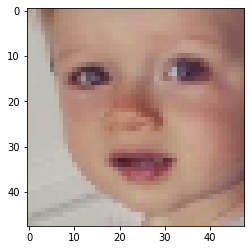

In [168]:
test_image(8878,images_f,images_f_2,Model)

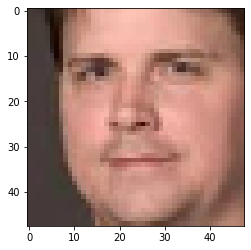

In [169]:
test_image(4578,images_f,images_f_2,Model)

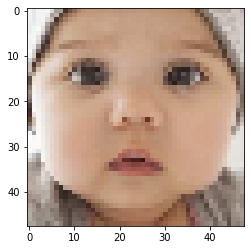

In [170]:
test_image(578,images_f,images_f_2,Model)

NameError: name 'runtime' is not defined